In [2]:
import numpy as np
from unyt import cm, pc
from synthesizer.photoionisation import cloudy23
import matplotlib.pyplot as plt
from astropy.io import ascii
import cmasher as cmr

# set style
plt.style.use('../../../matplotlibrc.txt')

In [3]:
# column density
values = np.arange(20., 22.5, 0.25)
# emission line
line = 'H 1 4861.32A'

hydrogen_density = 100 * cm**-3
column_density_limits = np.array([20., 22.])
depth_limits = column_density_limits - np.log10(hydrogen_density.to('cm**-3').value)


# Plot structure

18.96383126870995


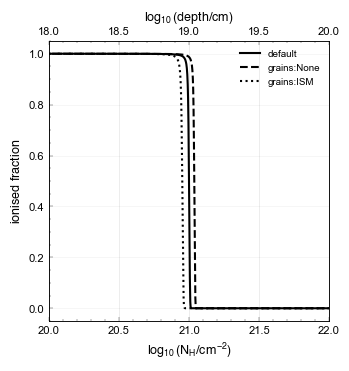

In [4]:
fig = plt.figure(figsize=(3.5, 3.5))

bottom = 0.15
height = 0.8
left = 0.15
width = 0.8

# column density axis
ax1 = fig.add_axes((left, bottom, width, height))
ax2 = ax1.twiny()

# depth axis
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top') 

# from unyt import cm, pc
# convert_to_parsecs = (1*cm).to('pc').value

ion = 'HII'

models = ['default', 'grains:None', 'grains:ISM']

for model, ls in zip(models, ['-', '--', ':']):

    # open the final model and use that
    data = ascii.read(f'{model}/9.ovr')

    depth = data['depth'] * cm

    ax2.plot(np.log10(depth.to('cm').value), data[ion], label = model, c='k', ls=ls)

# determine depth when efrac=-2; this is where we'd normally stop the calculation
efrac = -2.
efrac_depth = np.interp(efrac, np.log10(data['HII'][::-1]), data['depth'][::-1])
print(np.log10(efrac_depth))
ax1.axvline(np.log10(efrac_depth), alpha = 0.3, zorder=0, lw=2, ls='-', c='k')


ax2.legend(fontsize=7)
ax2.set_ylim([-0.05, 1.05])

ax1.set_ylabel(r'$ionised\ fraction$')

# set x-axis labels
ax1.set_xlim(column_density_limits)
ax1.set_xticks([20, 20.5, 21, 21.5, 22])
ax1.set_xlabel(r'$\log_{10}(N_{H}/cm^{-2})$')

ax2.set_xlim(depth_limits)
ax2.set_xticks([18, 18.5, 19, 19.5, 20])
ax2.set_xlabel('$\log_{10}(depth/cm)$')

plt.show()
fig.savefig('figs/column_density-ionised_fraction.pdf')

19.010412944955522


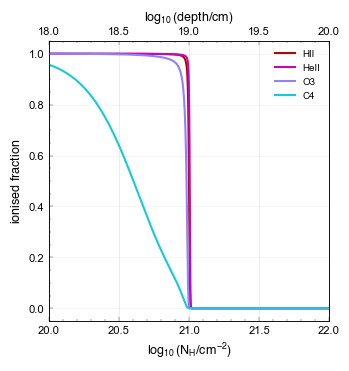

In [5]:

fig = plt.figure(figsize=(3.5, 3.5))

bottom = 0.15
height = 0.8
left = 0.15
width = 0.8

# column density axis
ax1 = fig.add_axes((left, bottom, width, height))
ax2 = ax1.twiny()

# depth axis
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top') 

# from unyt import cm, pc
# convert_to_parsecs = (1*cm).to('pc').value

ions = ['HII', 'HeII', 'O3', 'C4']

colours = cmr.take_cmap_colors('cmr.neon', len(ions), cmap_range=(0.0, 0.7))

# open the final model and use that
data = ascii.read(f'default/9.ovr')

depth = data['depth'] * cm
for ion, colour in zip(ions, colours):
    ax2.plot(np.log10(depth.to('cm').value), data[ion], label = ion, c=colour)

# determine depth when efrac=-2; this is where we'd normally stop the calculation
efrac = -2.
efrac_depth = np.interp(efrac, np.log10(data['HII'][::-1]), data['depth'][::-1])
print(np.log10(efrac_depth))
ax1.axvline(np.log10(efrac_depth), alpha = 0.3, zorder=0, lw=2, ls='-', c='k')


ax2.legend(fontsize=7)
ax2.set_ylim([-0.05, 1.05])

ax1.set_ylabel(r'$ionised\ fraction$')

# set x-axis labels
ax1.set_xlim(column_density_limits)
ax1.set_xticks([20, 20.5, 21, 21.5, 22])
ax1.set_xlabel(r'$\log_{10}(N_{H}/cm^{-2})$')

ax2.set_xlim(depth_limits)
ax2.set_xticks([18, 18.5, 19, 19.5, 20])
ax2.set_xlabel('$\log_{10}(depth/cm)$')

plt.show()
fig.savefig('figs/column_density-ionised_fraction_ion.pdf')

## Line luminosity

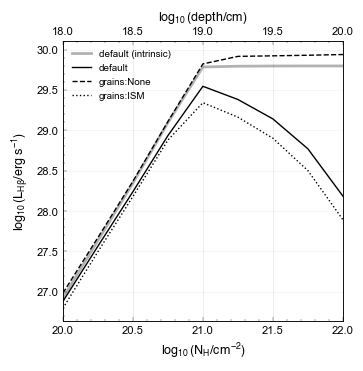

In [6]:

fig = plt.figure(figsize=(3.5, 3.5))

bottom = 0.15
height = 0.8
left = 0.15
width = 0.8

# column density axis
ax1 = fig.add_axes((left, bottom, width, height))
ax2 = ax1.twiny()

# depth axis
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top') 


# plot intrinsic for default model only
luminosities = []

for i, v in enumerate(values):

    linelist = cloudy23.read_linelist(f'default/{i+1}', extension='elin')

    s = linelist[0] == line
    luminosities.append(np.log10(linelist[2][s][0]))

ax1.plot(values, luminosities, ls='-', alpha=0.3, lw=2, c='k', label = 'default (intrinsic)')

models = ['default', 'grains:None', 'grains:ISM']

# models = ['default', 'no_iterate', 'iterate_to_convergence']

for model, ls in zip(models, ['-', '--', ':']):

    luminosities = []

    for i, v in enumerate(values):

        linelist = cloudy23.read_linelist(f'{model}/{i+1}', extension='eelin')

        s = linelist[0] == line
        luminosities.append(np.log10(linelist[2][s][0]))
    
    ax1.plot(values, luminosities, ls=ls, alpha=1.0, lw=1, c='k', label=model)


ax1.legend(fontsize=7)


ax1.set_ylabel(r'$\log_{10}(L_{H\beta}/erg\ s^{-1})$')

# set x-axis labels
ax1.set_xlim(column_density_limits)
ax1.set_xticks([20, 20.5, 21, 21.5, 22])
ax1.set_xlabel(r'$\log_{10}(N_{H}/cm^{-2})$')

ax2.set_xlim(depth_limits)
ax2.set_xticks([18, 18.5, 19, 19.5, 20])
ax2.set_xlabel('$\log_{10}(depth/cm)$')

plt.show()
fig.savefig('figs/column_density-hbeta_luminosity.pdf')
